<a href="https://colab.research.google.com/github/KarenYu729/Pytorch-Note/blob/main/autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# test

## Pytorch

In [ ]:
print(autoencoder(view_data))
print(view_data)

(tensor([0.0000e+00, 0.0000e+00, 3.1365e-08], grad_fn=<ReluBackward0>), tensor([-0.0007,  0.0007, -0.0012,  0.0007, -0.0007,  0.0017, -0.0005,  0.0003,
        -0.0007, -0.0010, -0.0012, -0.0003, -0.0015], grad_fn=<AddBackward0>))
tensor([-0.4150, -0.4877,  0.1157, -0.2726,  0.1581, -0.3628,  0.4347, -0.6132,
        -0.9828, -0.8032,  1.1765,  0.4411, -0.6691])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

流式输出内容被截断，只能显示最后 5000 行内容。
epoch= 0 MSE= 0.02033597230911255
epoch= 1 MSE= 0.01844566822052002
epoch= 2 MSE= 0.026789300441741944
epoch= 3 MSE= 0.01708853006362915
epoch= 4 MSE= 0.01889729976654053
epoch= 5 MSE= 0.021536865234375
epoch= 6 MSE= 0.02118305683135986
epoch= 7 MSE= 0.015608441829681397
epoch= 8 MSE= 0.01779369831085205
epoch= 9 MSE= 0.01813125491142273
epoch= 10 MSE= 0.013693944215774537
epoch= 11 MSE= 0.01660526990890503
epoch= 12 MSE= 0.010904467105865479
epoch= 13 MSE= 0.010948059558868408
epoch= 14 MSE= 0.009144188165664672
epoch= 15 MSE= 0.009685301184654237
epoch= 16 MSE= 0.014481489658355712
epoch= 17 MSE= 0.008687207102775573
epoch= 18 MSE= 0.009565407633781433
epoch= 19 MSE= 0.011401461362838745
epoch= 20 MSE= 0.008603138327598571
epoch= 21 MSE= 0.009669493436813354
epoch= 22 MSE= 0.008644325733184815
epoch= 23 MSE= 0.01369238018989563
epoch= 24 MSE= 0.008375188112258911
epoch= 25 MSE= 0.011044366359710693
epoch= 26 MSE= 0.009582909345626832
epoch= 27 MSE= 0.008090

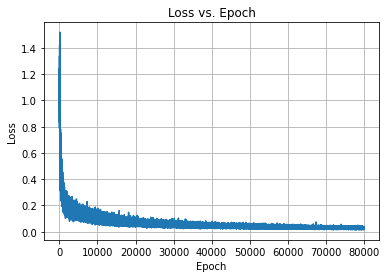

In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.pylab import plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = load_boston(return_X_y=True)
print(type(X))
print(len(X))

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline
 

# x_train = torch.tensor(X) 
x_train = X 

scaler = StandardScaler()
# 将待训练的输入scale
# fit(X[, y, sample_weight])   Compute the mean and std to be used for later scaling.
# fit_transform(X[, y]) Fit to data, then transform it.
scaler.fit(x_train) # 只是计算需要的值
x_train = scaler.transform(x_train)# 这里才是真的在scale 
# print(x_train)  
# x_train = torch.tensor(x_train)
# print(x_train)

torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 5000
BATCH_SIZE = 32
LR = 0.0001         # learning rate

N_TEST_IMG = 4

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(13, 128),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128, 64),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(64, 32),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(32, 3),  # compress to 3 features which can be visualized in plt
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 64),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(64, 128),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128, 256),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(256, 13),
            # nn.ReLU()
            # nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
# import torch.nn.functional as F
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         # encoder
#         self.enc1 = nn.Linear(in_features=13, out_features=256)
#         self.enc2 = nn.Linear(in_features=256, out_features=128)
#         self.enc3 = nn.Linear(in_features=128, out_features=64)
#         self.enc4 = nn.Linear(in_features=64, out_features=32)
#         self.enc5 = nn.Linear(in_features=32, out_features=16)
#         self.enc6 = nn.Linear(in_features=16, out_features=8)
#         # decoder 
#         self.dec1 = nn.Linear(in_features=8, out_features=16)
#         self.dec2 = nn.Linear(in_features=16, out_features=32)
#         self.dec3 = nn.Linear(in_features=32, out_features=64)
#         self.dec4 = nn.Linear(in_features=64, out_features=128)
#         self.dec5 = nn.Linear(in_features=128, out_features=256)
#         self.dec6 = nn.Linear(in_features=256, out_features=13)
#     def forward(self, x):
#         x = F.relu(self.enc1(x))
#         x = F.relu(self.enc2(x))
#         x = F.relu(self.enc3(x))
#         x = F.relu(self.enc4(x))
#         x = F.relu(self.enc5(x))
#         x = F.relu(self.enc6(x))
#         x = F.relu(self.dec1(x))
#         x = F.relu(self.dec2(x))
#         x = F.relu(self.dec3(x))
#         x = F.relu(self.dec4(x))
#         x = F.relu(self.dec5(x))
#         x = F.relu(self.dec6(x))
#         return x
# autoencoder = Autoencoder()

autoencoder = AutoEncoder()
# autoencoder = Autoencoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR, weight_decay = 1e-8)
loss_func = nn.MSELoss()
view_data = torch.tensor(x_train[-1]).float()

model_history = []

for epoch in range(EPOCH):
  batch_loss = 0
  for batchidx, (x) in enumerate(train_loader):

    x_hat = autoencoder(x.float())[1]
    loss = loss_func(x_hat.float(), x.float())
    
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    # print(loss.data)
    optimizer.step()
    model_history.append(loss.item())
    batch_loss += loss.item()
    if batchidx % 50 == 0:
        print('epoch=', epoch,'MSE=', batch_loss / 50)
        batch_loss = 0
  # if epoch % 50 == 0:
    
  #   print(loss.data)
  #   print(epoch, 'loss:', loss.item())
    # break 
  # if epoch %1000 == 0:
  #   # print(autoencoder)
  #   print(autoencoder.encoder[0].weight)
  #   break       
    
plt.plot(model_history)
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

## tensorflow

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 2508/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 2509/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 2510/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 2511/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 2512/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 2513/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 2514/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 2515/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 2516/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 2517/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 2518/5000
16/16 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 2519/5000
16/16 [==========================

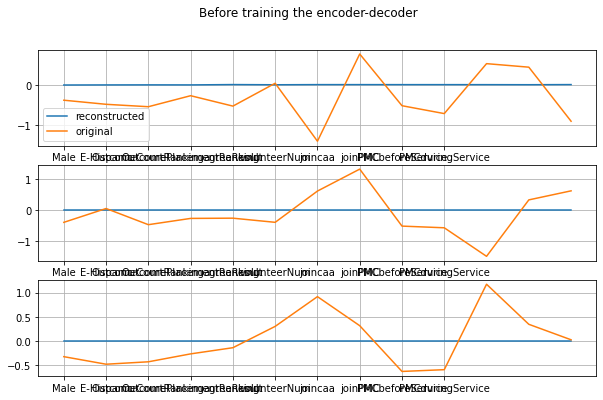

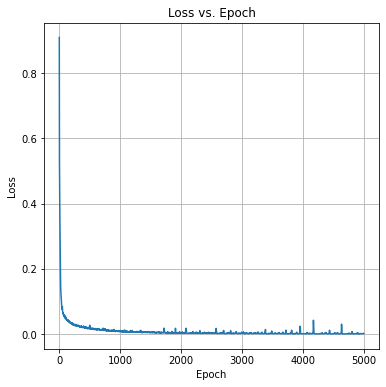

1/1 [==============================] - 0s 25ms/step


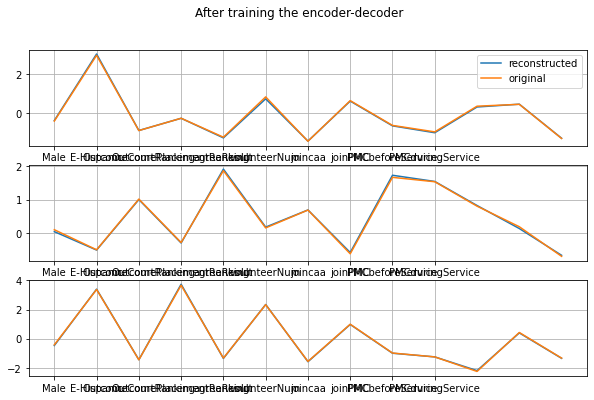

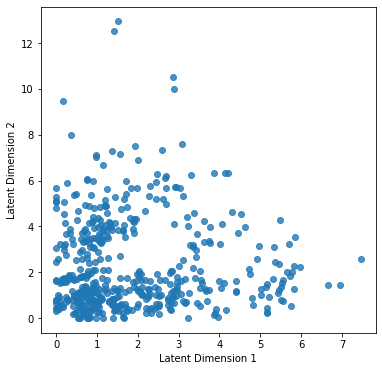

In [ ]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.pylab import plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X, y = load_boston(return_X_y=True)
print(type(X))
print(len(X))

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

# x_train = torch.tensor(X) 
x_train = X 

scaler = StandardScaler()
# 将待训练的输入scale
# fit(X[, y, sample_weight])   Compute the mean and std to be used for later scaling.
# fit_transform(X[, y]) Fit to data, then transform it.
scaler.fit(x_train) # 只是计算需要的值
x_train = scaler.transform(x_train)# 这里才是真的在scale 
# print(x_train)  
# x_train = torch.tensor(x_train)
# print(x_train)

##################
#Building the autoencoder
# 10 压缩到 2， 2 放大回 10
# 10 对应之前选取的10列
# This is the dimension of the original space
# input_dim = 10
input_dim = 13

# This is the dimension of the latent space (encoding space)
# latent_dim = 2
latent_dim = 3

# 设置网络
# Sequential()方法是一个容器，描述了神经网络的网络结构，在Sequential()的输入参数中描述从输入层到输出层的网络结构
# model = tf.keras.models.Sequential([网络结构])  #描述各层网络
# sequential 模型是那种最简单的结构的模型。按顺序一层一层训练，一层一层往前的那种。没有什么环的结构。比如像前馈网络那样。就像下图这样的，一层层的那种
# tf.keras.layers.Dense(
#     units,                                 # 正整数，该层输出的维数
#     activation=None,                       # 激活函数，不指定则没有
#     use_bias=True,						   # bias为True（默认使用）
#     kernel_initializer='glorot_uniform',   # 核权重矩阵的初始值设定项
#     bias_initializer='zeros',              # 偏差向量的初始值设定项
#     kernel_regularizer=None,               # 正则化函数应用于核权矩阵
#     bias_regularizer=None,                 # 应用于偏差向量的正则化函数
#     activity_regularizer=None,             # Regularizer function applied to the output of the layer (its "activation")
#     kernel_constraint=None,                # Constraint function applied to the kernel weights matrix.
#     bias_constraint=None, **kwargs         # Constraint function applied to the bias vector
# )
# 全连接层在tensorflow里面用Dense函数来定义， 如果用Dense层作为第一层，需要提供一个input_shape参数来描述输入张量的形状。
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

# 如果我们像实现一些更为复杂的网络，比如多输入多输出的模型就需要使用到keras.models.Model()来构建网络。
# 使用inputs与outputs建立函数链式模型 # model = keras.Model(inputs=input_layer, outputs=output_layer_tensor)
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
# # .1 训练参数 # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
# model.compile()方法用于在配置训练方法时，告知训练时用的优化器、损失函数和准确率评测标准
# model.compile(optimizer = 优化器，
#                         loss = 损失函数，
#                         metrics = ["准确率”])
# 其中：
# optimizer可以是字符串形式给出的优化器名字，也可以是函数形式，使用函数形式可以设置学习率、动量和超参数
# 例如：“sgd”   或者   tf.optimizers.SGD(lr = 学习率，decay = 学习率衰减率, momentum = 动量参数）

#            “adagrad"  或者  tf.keras.optimizers.Adagrad(lr = 学习率，decay = 学习率衰减率）

#             ”adadelta"  或者  tf.keras.optimizers.Adadelta(lr = 学习率，decay = 学习率衰减率）

#              “adam"  或者  tf.keras.optimizers.Adam(lr = 学习率, decay = 学习率衰减率）
# loss可以是字符串形式给出的损失函数的名字，也可以是函数形式
# 例如：
# ”mse" 或者 tf.keras.losses.MeanSquaredError()
#  "sparse_categorical_crossentropy"  或者  tf.keras.losses.SparseCatagoricalCrossentropy(from_logits = False)

# 损失函数经常需要使用softmax函数来将输出转化为概率分布的形式，在这里from_logits代表是否将输出转为概率分布的形式，为False时表示转换为概率分布，为True时表示不转换，直接输出
autoencoder.compile(loss='mse', optimizer='adam')


def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

###########
#Training the autoencoder
model_history = autoencoder.fit(x_train, x_train, epochs=5000, batch_size=32, verbose=1)
print(pd.DataFrame(model_history.history["loss"]))

plt.figure(figsize=(6,6))
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.show()

plot_orig_vs_recon('After training the encoder-decoder')


encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=.8)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

# autoencoder example

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [ ]:
torch.manual_seed(1)    # reproducible


In [ ]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [ ]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=True,                        # download it if you don't have it
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


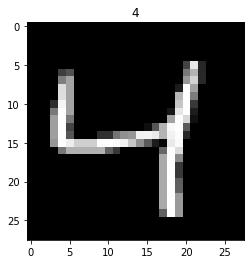

In [ ]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [ ]:
train_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)
Epoch:  0 | train loss: 0.2322


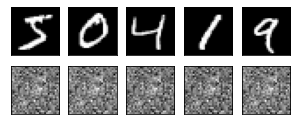

Epoch:  0 | train loss: 0.0505


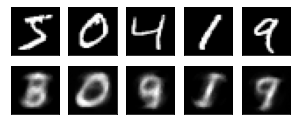

Epoch:  2 | train loss: 0.0406


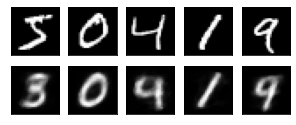

Epoch:  2 | train loss: 0.0443


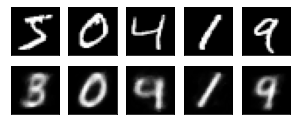

Epoch:  9 | train loss: 0.0353


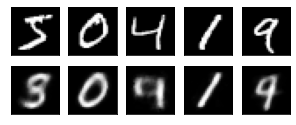

Epoch:  9 | train loss: 0.0384


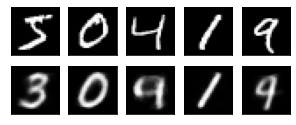

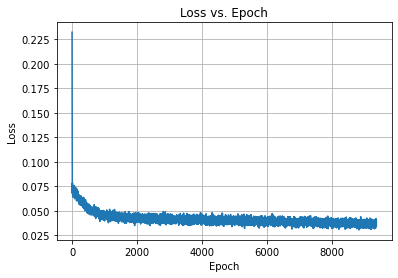

In [ ]:
autoencoder = AutoEncoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)
model_history = []
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients
        model_history.append(loss.data)
        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data)
            
            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); plt.pause(0.05)
plt.plot(model_history)
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)


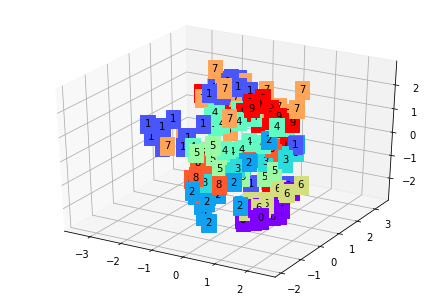

In [ ]:
# visualize in 3D plot
view_data = Variable(train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.)
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()


**用数据**

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [ ]:
torch.manual_seed(1)    # reproducible

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'No.': [1,2,3,4,5],
    'name': ['A', 'B', 'C', 'D', 'E'],
    'hour': [5, 6, 6, 8, 7],
    'hourPay': [20, 25, 26, 35, 40]
})
df['salary'] = df['hour']*df['hourPay']
# df = df.drop(['No.', 'name'], axis=1)
df

,hour,hourPay,salary
0,5,20,100
1,6,25,150
2,6,26,156
3,8,35,280
4,7,40,280


# **Pytorch**

*reference:*
https://github.com/MorvanZhou/PyTorch-Tutorial/tree/master/tutorial-contents-notebooks

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
data_dir = '/content/drive/MyDrive/Colab Notebooks/add_new_features_to_Children.csv'
df = pd.read_csv(data_dir)
# dropcol = ['childServiceKey', 'childDateActive', 'childDateResigned', 'childDatePmc',
#            'childGender', 'childEthnicity', 'childRace', 'childOutcomeCourt',
#            'childOutcomeAgreementBit', 'childOutcomeAgreementCode', 'childOutcomePlacement']
# npdf = df.drop(dropcol, axis=1)
# col_names = ['childAgeDateActive', 'ServiceTimeSpan', 'volunteerNum', 'joincaa', 'joinPMC', 'sameRace', 
#                 'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth']
# col_names = ['childAgeDateActive', 'ServiceTimeSpan', 'volunteerNum', 'joincaa', 'joinPMC', 'sameRace', 
#                 'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth',
#              'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth', 'Male']
# col_names = ['Male', 'E-Hispanic', 'OutcomeCourtRanking', 
# 'OutcomePlacementRanking', 'agreeResult', 'volunteerNum',
# 'joincaa', 'joinPMC', 'PMCbeforeService', 'PMCduringService', 'PMCafterService', 'sameRace',
# 'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth']

col_names = ['childAgeDateActive', 'childAgeDateResigned', 'Male', 'E-Hispanic', 'OutcomeCourtRanking', 'childDateActive_Year',
             'OutcomePlacementRanking', 'childDateResigned_Year', 'ServiceTimeSpan', 'agreeResult', 'volunteerNum',
             'joincaa', 'joinPMC', 'PMCbeforeService', 'PMCduringService', 'PMCafterService', 'sameRace',
             # 'LargestVolunteerAge', 'SmallestVolunteerAge', 'LargestAgeDiff', 'SmallestAgeDiff', 
             # activity count (how many these activities happened during the case-overall)
    'CntX-Archive-X-Retired: Contact-Email/Phone/Text','CntContact: Child F2F or Visitation',
    'CntAttend Hearing','CntContact: Child Other Contact (not Face-to-Face)',

    # activity Freq (how many these activities happened each month during the case-average)
    'FreqX-Archive-X-Retired: Contact-Email/Phone/Text','FreqContact: Child F2F or Visitation',
    'FreqAttend Hearing','FreqContact: Child Other Contact (not Face-to-Face)',

    # activity acc hour (how long these activities last during the case-overall)
    'accHourX-Archive-X-Retired: Contact-Email/Phone/Text','accHourContact: Child F2F or Visitation',
    'accHourAttend Hearing','accHourContact: Child Other Contact (not Face-to-Face)',

    # month activity average hour (how long these activities last each month during the case-average)
    'avgHourX-Archive-X-Retired: Contact-Email/Phone/Text','avgHourContact: Child F2F or Visitation',
    'avgHourAttend Hearing','avgHourContact: Child Other Contact (not Face-to-Face)',

    # activity average hour (how long these activities last each time during the case-average)
    'avgX-Archive-X-Retired: Contact-Email/Phone/Text','avgContact: Child F2F or Visitation',
    'avgAttend Hearing','avgContact: Child Other Contact (not Face-to-Face)', 
    
    'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth']
npdf = df[col_names]  
# x_train = torch.from_numpy(npdf.values) 

x_train = torch.tensor(npdf.values)  

scaler = StandardScaler()
# 将待训练的输入scale
# fit(X[, y, sample_weight])   Compute the mean and std to be used for later scaling.
# fit_transform(X[, y]) Fit to data, then transform it.
scaler.fit(x_train) # 只是计算需要的值
x_train = scaler.transform(x_train)# 这里才是真的在scale 
# print(x_train)  
# x_train = torch.tensor(x_train)
# print(x_train)


In [ ]:
torch.manual_seed(1)    # reproducible

In [ ]:
# Hyper Parameters
EPOCH = 5000
BATCH_SIZE = 50
LR = 0.0001         # learning rate

N_TEST_IMG = 4

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)


In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(41, 128),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128, 64),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(64, 32),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(32, 3),  # compress to 3 features which can be visualized in plt
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 64),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(64, 128),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128, 256),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(256, 41),
            # nn.ReLU()
            # nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
pd.DataFrame(mnist_train)

,0,1
0,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(0), tensor(4), tensor(0), tensor(3), t..."
1,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(8), tensor(6), tensor(6), tensor(1), t..."
2,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(7), tensor(6), tensor(7), tensor(1), t..."
3,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(3), tensor(7), tensor(1), tensor(3), t..."
4,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(1), tensor(3), tensor(9), tensor(1), t..."
...,...,...
1870,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(4), tensor(4), tensor(0), tensor(7), t..."
1871,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(1), tensor(0), tensor(9), tensor(2), t..."
1872,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(0), tensor(3), tensor(0), tensor(0), t..."
1873,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(2), tensor(8), tensor(0), tensor(8), t..."


In [ ]:
pd.DataFrame(train_loader)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  values = np.array([convert(v) for v in values])
/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,"[[tensor(-0.1248, dtype=torch.float64), tensor..."
1,"[[tensor(-1.0785, dtype=torch.float64), tensor..."
2,"[[tensor(-0.1248, dtype=torch.float64), tensor..."
3,"[[tensor(1.2105, dtype=torch.float64), tensor(..."
4,"[[tensor(0.6383, dtype=torch.float64), tensor(..."
...,...
74,"[[tensor(-1.0785, dtype=torch.float64), tensor..."
75,"[[tensor(-0.1248, dtype=torch.float64), tensor..."
76,"[[tensor(-1.0785, dtype=torch.float64), tensor..."
77,"[[tensor(1.4013, dtype=torch.float64), tensor(..."


流式输出内容被截断，只能显示最后 5000 行内容。
epoch= 2500 MSE= 0.0035335206985473632
epoch= 2500 MSE= 0.17327007442712783
epoch= 2501 MSE= 0.0034755611419677733
epoch= 2501 MSE= 0.1684419697523117
epoch= 2502 MSE= 0.003144984543323517
epoch= 2502 MSE= 0.16858300298452378
epoch= 2503 MSE= 0.0034413161873817445
epoch= 2503 MSE= 0.17222642213106154
epoch= 2504 MSE= 0.0036542797088623047
epoch= 2504 MSE= 0.16870727747678757
epoch= 2505 MSE= 0.0031947743892669677
epoch= 2505 MSE= 0.1695886445045471
epoch= 2506 MSE= 0.003377878367900848
epoch= 2506 MSE= 0.1703736674785614
epoch= 2507 MSE= 0.0034137186408042908
epoch= 2507 MSE= 0.1684978049993515
epoch= 2508 MSE= 0.003376822769641876
epoch= 2508 MSE= 0.1694304695725441
epoch= 2509 MSE= 0.0038063716888427734
epoch= 2509 MSE= 0.17053435295820235
epoch= 2510 MSE= 0.0033200493454933165
epoch= 2510 MSE= 0.17073014199733735
epoch= 2511 MSE= 0.003453153669834137
epoch= 2511 MSE= 0.16904670923948287
epoch= 2512 MSE= 0.0033605363965034485
epoch= 2512 MSE= 0.168888868093

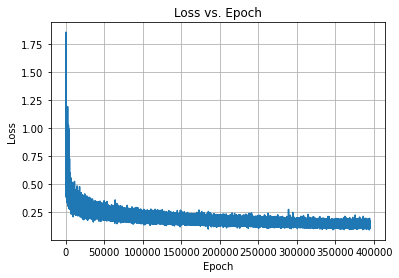

In [ ]:
autoencoder = AutoEncoder()
# autoencoder = Autoencoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR, weight_decay = 1e-8)
loss_func = nn.MSELoss()
view_data = torch.tensor(x_train[-1]).float()

model_history = []

for epoch in range(EPOCH):
  batch_loss = 0
  for batchidx, (x) in enumerate(train_loader):

    x_hat = autoencoder(x.float())[1]
    loss = loss_func(x_hat.float(), x.float())
    
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    # print(loss.data)
    optimizer.step()
    model_history.append(loss.item())
    batch_loss += loss.item()
    if batchidx % 50 == 0:
        print('epoch=', epoch,'MSE=', batch_loss / 50)
        batch_loss = 0
  # if epoch % 50 == 0:
    
  #   print(loss.data)
  #   print(epoch, 'loss:', loss.item())
    # break 
  # if epoch %1000 == 0:
  #   # print(autoencoder)
  #   print(autoencoder.encoder[0].weight)
  #   break       
    
plt.plot(model_history)
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [ ]:
for name, parms in autoencoder.named_parameters():
	print('-->name:', name, '-->grad_requirs:', parms.requires_grad, '--weight', torch.mean(parms.data), ' -->grad_value:', torch.mean(parms.grad))

-->name: encoder.0.weight -->grad_requirs: True --weight tensor(0.0317)  -->grad_value: tensor(-1.0053e-05)
-->name: encoder.0.bias -->grad_requirs: True --weight tensor(-0.0869)  -->grad_value: tensor(-4.6095e-05)
-->name: encoder.2.weight -->grad_requirs: True --weight tensor(0.0211)  -->grad_value: tensor(2.0586e-06)
-->name: encoder.2.bias -->grad_requirs: True --weight tensor(0.2409)  -->grad_value: tensor(-1.2490e-05)
-->name: encoder.4.weight -->grad_requirs: True --weight tensor(-0.0089)  -->grad_value: tensor(9.9227e-06)
-->name: encoder.4.bias -->grad_requirs: True --weight tensor(-0.4613)  -->grad_value: tensor(5.8486e-05)
-->name: encoder.6.weight -->grad_requirs: True --weight tensor(0.0128)  -->grad_value: tensor(-0.0008)
-->name: encoder.6.bias -->grad_requirs: True --weight tensor(0.2061)  -->grad_value: tensor(0.0017)
-->name: decoder.0.weight -->grad_requirs: True --weight tensor(0.0416)  -->grad_value: tensor(-0.0003)
-->name: decoder.0.bias -->grad_requirs: True --w

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
data_dir = '/content/drive/MyDrive/Colab Notebooks/add_new_features_to_Volunteer-children_Pair.csv'
df = pd.read_csv(data_dir)
target = df[['caaServiceKey']]
dropcol = ['caaServiceKey']
npdf = df.drop(dropcol, axis=1)
# x_train = torch.from_numpy(npdf.values) 




流式输出内容被截断，只能显示最后 5000 行内容。
epoch= 0 MSE= 0.01316790223121643
epoch= 1 MSE= 0.031720473766326904
epoch= 2 MSE= 0.015370955467224121
epoch= 3 MSE= 0.02409066438674927
epoch= 4 MSE= 0.02006287336349487
epoch= 5 MSE= 0.02232199192047119
epoch= 6 MSE= 0.018634670972824098
epoch= 7 MSE= 0.01769450306892395
epoch= 8 MSE= 0.0146226966381073
epoch= 9 MSE= 0.018918824195861817
epoch= 10 MSE= 0.020845375061035155
epoch= 11 MSE= 0.01577257990837097
epoch= 12 MSE= 0.023473360538482667
epoch= 13 MSE= 0.018783831596374513
epoch= 14 MSE= 0.014200952053070068
epoch= 15 MSE= 0.016459211111068725
epoch= 16 MSE= 0.013437469005584717
epoch= 17 MSE= 0.018101016283035277
epoch= 18 MSE= 0.013335086107254028
epoch= 19 MSE= 0.015271435976028442
epoch= 20 MSE= 0.01347281813621521
epoch= 21 MSE= 0.01268888235092163
epoch= 22 MSE= 0.021053230762481688
epoch= 23 MSE= 0.013341397047042847
epoch= 24 MSE= 0.020917763710021974
epoch= 25 MSE= 0.017212828397750856
epoch= 26 MSE= 0.014007331132888793
epoch= 27 MSE= 0.0157

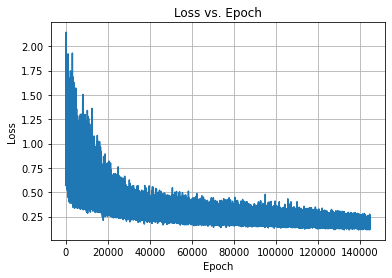

In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline
 
x_train = torch.tensor(npdf.values)  

scaler = StandardScaler()
# 将待训练的输入scale
# fit(X[, y, sample_weight])   Compute the mean and std to be used for later scaling.
# fit_transform(X[, y]) Fit to data, then transform it.
scaler.fit(x_train) # 只是计算需要的值
x_train = scaler.transform(x_train)# 这里才是真的在scale 
# print(x_train)  
# x_train = torch.tensor(x_train)
# print(x_train)

torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 5000
BATCH_SIZE = 32
LR = 0.0001         # learning rate

N_TEST_IMG = 4

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(60, 128),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128, 64),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(64, 32),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(32, 3),  # compress to 3 features which can be visualized in plt
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 64),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(64, 128),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(128, 256),
            # nn.Tanh(),
            nn.ReLU(),
            nn.Linear(256, 60),
            # nn.ReLU()
            # nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


autoencoder = AutoEncoder()
# autoencoder = Autoencoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR, weight_decay = 1e-8)
loss_func = nn.MSELoss()
view_data = torch.tensor(x_train[-1]).float()

model_history = []

for epoch in range(EPOCH):
  batch_loss = 0
  for batchidx, (x) in enumerate(train_loader):

    x_hat = autoencoder(x.float())[1]
    loss = loss_func(x_hat.float(), x.float())
    
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    # print(loss.data)
    optimizer.step()
    model_history.append(loss.item())
    batch_loss += loss.item()
    if batchidx % 50 == 0:
        print('epoch=', epoch,'MSE=', batch_loss / 50)
        batch_loss = 0
  # if epoch % 50 == 0:
    
  #   print(loss.data)
  #   print(epoch, 'loss:', loss.item())
    # break 
  # if epoch %1000 == 0:
  #   # print(autoencoder)
  #   print(autoencoder.encoder[0].weight)
  #   break       
    
plt.plot(model_history)
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [12]:
pd.set_option('display.max_rows', None)
encode_x = pd.DataFrame(autoencoder(torch.tensor(x_train).float())[0])
encode_x

,0,1,2
0,"tensor(64.6227, grad_fn=<UnbindBackward0>)","tensor(35.9762, grad_fn=<UnbindBackward0>)","tensor(2.7065, grad_fn=<UnbindBackward0>)"
1,"tensor(74.4891, grad_fn=<UnbindBackward0>)","tensor(41.9406, grad_fn=<UnbindBackward0>)","tensor(3.3969, grad_fn=<UnbindBackward0>)"
2,"tensor(127.2475, grad_fn=<UnbindBackward0>)","tensor(67.2592, grad_fn=<UnbindBackward0>)","tensor(27.4794, grad_fn=<UnbindBackward0>)"
3,"tensor(23.4900, grad_fn=<UnbindBackward0>)","tensor(15.6700, grad_fn=<UnbindBackward0>)","tensor(7.4944, grad_fn=<UnbindBackward0>)"
4,"tensor(199.9648, grad_fn=<UnbindBackward0>)","tensor(172.6735, grad_fn=<UnbindBackward0>)","tensor(25.8555, grad_fn=<UnbindBackward0>)"
5,"tensor(19.5121, grad_fn=<UnbindBackward0>)","tensor(12.4383, grad_fn=<UnbindBackward0>)","tensor(6.4344, grad_fn=<UnbindBackward0>)"
6,"tensor(116.5950, grad_fn=<UnbindBackward0>)","tensor(86.7402, grad_fn=<UnbindBackward0>)","tensor(9.1775, grad_fn=<UnbindBackward0>)"
7,"tensor(116.0667, grad_fn=<UnbindBackward0>)","tensor(85.9607, grad_fn=<UnbindBackward0>)","tensor(8.4415, grad_fn=<UnbindBackward0>)"
8,"tensor(62.0863, grad_fn=<UnbindBackward0>)","tensor(41.0698, grad_fn=<UnbindBackward0>)","tensor(11.1056, grad_fn=<UnbindBackward0>)"
9,"tensor(64.4044, grad_fn=<UnbindBackward0>)","tensor(42.8462, grad_fn=<UnbindBackward0>)","tensor(11.4050, grad_fn=<UnbindBackward0>)"


In [18]:
pd.set_option('display.max_rows', None)
avg_encode = pd.DataFrame(encode_x.mean(axis=1))
avg_encode

,0
0,34.435153
1,39.942195
2,73.995366
3,15.551493
4,132.831278
5,12.794927
6,70.837560
7,70.156316
8,38.087240
9,39.551842


In [22]:
avg_encode.sort_values(by=0)

,0
345,1.904585
592,1.951612
306,2.240493
227,2.419473
391,2.444942
133,2.548807
252,2.689922
516,2.726030
421,2.904965
167,3.080421


In [ ]:
epochs = 10
lr = 1e-3
model = AE()
criteon = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=20, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


https://mp.weixin.qq.com/s?__biz=Mzg3ODE0NDQzOA==&mid=2247483863&idx=1&sn=963f2b260f0a76b9ce6437e2bcc706cc&chksm=cf197f0ef86ef6189d380d494d97fffee5f1927d20796f8b1eb0457421f4facf15bbb2f90107&scene=27

</br>
https://www.modb.pro/db/410497


In [ ]:

import torch
import visdom
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch import nn, optim
mnist_train = datasets.MNIST('mnist', train=True, transform=transforms.Compose([
    transforms.ToTensor()
]), download=True)
mnist_train = DataLoader(mnist_train, batch_size=32, shuffle=True)

mnist_test = datasets.MNIST('mnist', train=False, transform=transforms.Compose([
    transforms.ToTensor()
]), download=True)
mnist_test = DataLoader(mnist_test, batch_size=32)


In [ ]:
pd.DataFrame(mnist_train)

,0,1
0,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(0), tensor(9), tensor(7), tensor(7), t..."
1,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(1), tensor(4), tensor(7), tensor(3), t..."
2,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(9), tensor(7), tensor(8), tensor(6), t..."
3,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(5), tensor(5), tensor(1), tensor(0), t..."
4,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(3), tensor(0), tensor(2), tensor(9), t..."
...,...,...
1870,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(6), tensor(7), tensor(1), tensor(6), t..."
1871,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(3), tensor(8), tensor(6), tensor(9), t..."
1872,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(8), tensor(2), tensor(5), tensor(1), t..."
1873,"[[[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.,...","[tensor(0), tensor(4), tensor(3), tensor(6), t..."


# **Tensorflow**
这里选取10个feature

*reference：https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html*

</br></br></br>
*other：*
https://blog.paperspace.com/dimension-reduction-with-autoencoders/

https://www.analyticsvidhya.com/blog/2021/06/dimensionality-reduction-using-autoencoders-in-python/#:~:text=AutoEncoder%20is%20an%20unsupervised%20Artificial,representation%20of%20the%20input%20data 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/content/drive/MyDrive/Colab Notebooks/add_new_features_to_Children.csv'
df = pd.read_csv(data_dir, dtype=str)
# metric_names = ['childAgeDateActive', 'ServiceTimeSpan', 'volunteerNum', 'joincaa', 'joinPMC', 'sameRace', 
#                 'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth']
metric_names = ['Male', 'E-Hispanic', 'OutcomeCourtRanking', 
'OutcomePlacementRanking', 'agreeResult', 'volunteerNum',
'joincaa', 'joinPMC', 'PMCbeforeService', 'PMCduringService', 'PMCafterService', 'sameRace',
'activityFreq', 'activityaccHour', 'AvgHourPerActivity', 'AvgHourPerMonth']                
npdf = df[metric_names] 

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 2510/5000
123/123 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 2511/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0054
Epoch 2512/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0068
Epoch 2513/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 2514/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0091
Epoch 2515/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 2516/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0057
Epoch 2517/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0069
Epoch 2518/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0093
Epoch 2519/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0100
Epoch 2520/5000
123/123 [==============================] - 1s 5ms/step - loss: 0.0264
Epoch 2521/5000
123/123 [==

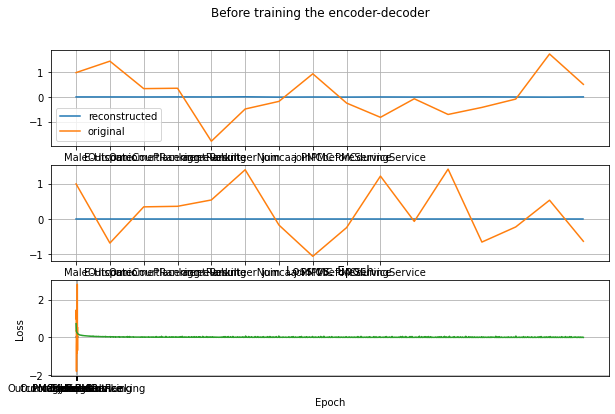

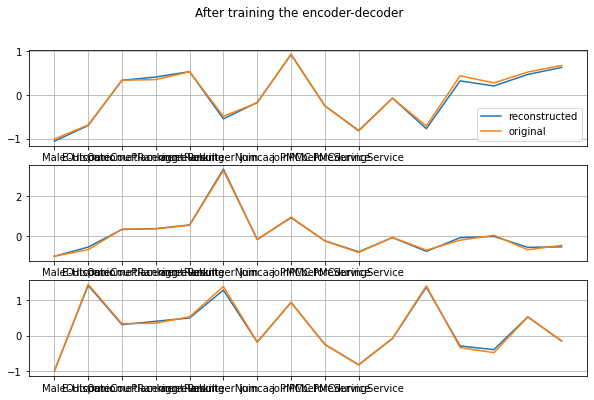

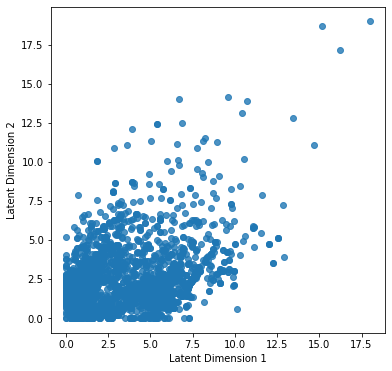

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

# # Load database
# pdf = pd.read_excel(r'/home/stathis/Jupyter_Notebooks/datasets/vmat_prostate_complexity.xlsx')

# # Select only VMAT plans with radical intent (i.e., skip patients treated postoperatively
# # in a salvage or adjuvant setting)
# # 在读入的dataframe里选择setting这一列的值是radical的行
# pdf = pdf[pdf['setting'] == 'radical']

# # Calculate the combinatorial complexity index LTMCSV = LT * MCSV
# # 有两列的名字分别为It和mcsv,两者相乘的结果得到新的一列，名为Itmcsv
# pdf['ltmcsv'] = pdf['lt'] * pdf['mcsv']

# # Select only the columns corresponding to the desired complexity metrics
# # 选择的列的列名
# metric_names = ['coa', 'em', 'esf', 'lt', 'ltmcsv', 'mcs', 'mcsv', 'mfa', 'pi', 'sas']
# # 筛选出来选择的列
# npdf = pdf[metric_names]

# Convert pandas dataframe to numpy array
# 将dataframe变成numpy数组
x_train = npdf.to_numpy()

# Scale data to have zero mean and unit variance
# preprocessing，对数据做正则化，选择scaling的方法
scaler = StandardScaler()
# 将待训练的输入scale
# fit(X[, y, sample_weight])   Compute the mean and std to be used for later scaling.
# fit_transform(X[, y]) Fit to data, then transform it.
scaler.fit(x_train) # 只是计算需要的值
x_train = scaler.transform(x_train)# 这里才是真的在scale

##################
#Building the autoencoder
# 10 压缩到 2， 2 放大回 10
# 10 对应之前选取的10列
# This is the dimension of the original space
# input_dim = 10
input_dim = 16

# This is the dimension of the latent space (encoding space)
# latent_dim = 2
latent_dim = 3

# 设置网络
# Sequential()方法是一个容器，描述了神经网络的网络结构，在Sequential()的输入参数中描述从输入层到输出层的网络结构
# model = tf.keras.models.Sequential([网络结构])  #描述各层网络
# sequential 模型是那种最简单的结构的模型。按顺序一层一层训练，一层一层往前的那种。没有什么环的结构。比如像前馈网络那样。就像下图这样的，一层层的那种
# tf.keras.layers.Dense(
#     units,                                 # 正整数，该层输出的维数
#     activation=None,                       # 激活函数，不指定则没有
#     use_bias=True,						   # bias为True（默认使用）
#     kernel_initializer='glorot_uniform',   # 核权重矩阵的初始值设定项
#     bias_initializer='zeros',              # 偏差向量的初始值设定项
#     kernel_regularizer=None,               # 正则化函数应用于核权矩阵
#     bias_regularizer=None,                 # 应用于偏差向量的正则化函数
#     activity_regularizer=None,             # Regularizer function applied to the output of the layer (its "activation")
#     kernel_constraint=None,                # Constraint function applied to the kernel weights matrix.
#     bias_constraint=None, **kwargs         # Constraint function applied to the bias vector
# )
# 全连接层在tensorflow里面用Dense函数来定义， 如果用Dense层作为第一层，需要提供一个input_shape参数来描述输入张量的形状。
encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

# 如果我们像实现一些更为复杂的网络，比如多输入多输出的模型就需要使用到keras.models.Model()来构建网络。
# 使用inputs与outputs建立函数链式模型 # model = keras.Model(inputs=input_layer, outputs=output_layer_tensor)
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
# # .1 训练参数 # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
# model.compile()方法用于在配置训练方法时，告知训练时用的优化器、损失函数和准确率评测标准
# model.compile(optimizer = 优化器，
#                         loss = 损失函数，
#                         metrics = ["准确率”])
# 其中：
# optimizer可以是字符串形式给出的优化器名字，也可以是函数形式，使用函数形式可以设置学习率、动量和超参数
# 例如：“sgd”   或者   tf.optimizers.SGD(lr = 学习率，decay = 学习率衰减率, momentum = 动量参数）

#            “adagrad"  或者  tf.keras.optimizers.Adagrad(lr = 学习率，decay = 学习率衰减率）

#             ”adadelta"  或者  tf.keras.optimizers.Adadelta(lr = 学习率，decay = 学习率衰减率）

#              “adam"  或者  tf.keras.optimizers.Adam(lr = 学习率, decay = 学习率衰减率）
# loss可以是字符串形式给出的损失函数的名字，也可以是函数形式
# 例如：
# ”mse" 或者 tf.keras.losses.MeanSquaredError()
#  "sparse_categorical_crossentropy"  或者  tf.keras.losses.SparseCatagoricalCrossentropy(from_logits = False)

# 损失函数经常需要使用softmax函数来将输出转化为概率分布的形式，在这里from_logits代表是否将输出转为概率分布的形式，为False时表示转换为概率分布，为True时表示不转换，直接输出
autoencoder.compile(loss='mse', optimizer='adam')

def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

###########
#Training the autoencoder
model_history = autoencoder.fit(x_train, x_train, epochs=5000, batch_size=32, verbose=1)
print(pd.DataFrame(model_history.history["loss"]))

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

plot_orig_vs_recon('After training the encoder-decoder')


encoded_x_train = encoder(x_train)
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=.8)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');